# Business Problem
### An Online travel booking company is suffering from loss in revenue because of the uncertain booking cancelation of its customers. The company wants to 
### know which customer will cancel the booking. As a data-scientist we have to help the company to predict whether the customer will cancel the booking or 
### not.We have all the booking details like **arrival_date_year**, **stays_in_week_nights**, **arrival_date_day_of_month** etc of the customers from 
### various countries.We have to do some data analysis to answer some questions and we have to work on Machine Learning models to help predict whether the 
### customer will cancel the booking or not.We will focus on Exploratory Data Analysis for answering business questions first and then move on to the prediction approach.

# Dataset Detailes

 `0   hotel`                           (H1 = Resort Hotel or H2 = City Hotel)    
 
 `1   is_canceled`                     Value indicating if the booking was canceled (1) or not (0)          
 
 `2   lead_time`                   Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
 
 `3   arrival_date_year`             Year of arrival date
 
 `4   arrival_date_month`              Month of arrival date
 
 `5   arrival_date_week_number`        Week number of year for arrival date
 
 `6   arrival_date_day_of_month`        Day of arrival date
 
 `7   stays_in_weekend_nights`          Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
 
 `8   stays_in_week_nights`             Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
 
 `9   adults`                            Number of adults
 
 `10  children`                        Number of children
 
 `11  babies`           Number of babies               
 
 `12  meal`                            Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal 
 
 `13  country`                          Country of origin. Categories are represented in the ISO 3155–3:2013 format
 
 `14  market_segment`    Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”              
 
 `15  distribution_channel`       Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”      
 
 `16  is_repeated_guest`               Value indicating if the booking name was from a repeated guest (1) or not (0)
 
 `17  previous_cancellations`          Number of previous bookings that were cancelled by the customer prior to the current booking
 
 `18  previous_bookings_not_canceled` Number of previous bookings not cancelled by the customer prior to the current booking
 
 `19  reserved_room_type`               Code of room type reserved. Code is presented instead of designation for anonymity reasons.
 
 `20  assigned_room_type`Code for the type of room assigned to the booking.Code is presented instead of designation for anonymity reasons.
 
 `21  booking_changes` Number of changes made to the booking from the moment the booking was entered on the PMS until the moment of check-in or out
 
 `22  deposit_type`  Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No 
 
 `23  agent`       ID of the travel agency that made the booking                   
 
 `24  company` ID of the company that made the booking or responsible for paying the booking. 
 
 `25  days_in_waiting_list` Number of days the booking was in the waiting list before it was confirmed to the customer           
 
 `26  customer_type`    Type of booking, assuming one of four categories:Transient - Transient-Party - Contract - Group               
 
 `27  adr`                    Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
 
 `28  required_car_parking_spaces`       Number of car parking spaces required by the customer
 
 `29  total_of_special_requests`Number of special requests made by the customer (e.g. twin bed or high floor)      
 
 `30  reservation_status`       Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out
 
 `31  reservation_status_date ` Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to 

# Import the Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


# Load and Overview on the dataset

In [3]:
df = pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape

(119390, 32)

# EDA

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In the column `agent` has many missing values. It means that the reservation was mostly made by a person 

In the column `company` has many missing values. It means it is mostly like private

## Handel the missing values

In [8]:
df['country'].fillna('PRT',inplace=True)
df.fillna(0,inplace=True)
df.isnull().values.any()

False

## Where do the guests come from & Perform spatial analysis

In [9]:
df.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [10]:
resort = df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==0)]
city   = df[(df['hotel']=='City Hotel')   &  (df['is_canceled']==0)]

In [11]:
resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [12]:
resort.shape

(28938, 32)

In [13]:
city.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,No Deposit,6.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-03
40066,City Hotel,0,3,2015,July,27,2,0,3,1,...,No Deposit,1.0,0.0,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05
40070,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
40071,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0.0,0,Transient-Party,43.00,0,0,Check-Out,2015-07-05
40072,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05


In [14]:
city.shape

(46228, 32)

In [15]:
import plotly.graph_objs as go
from plotly.offline import iplot

label = resort['country'].value_counts().index
value = resort['country'].value_counts()

iplot([go.Pie(labels=label,values=value,hoverinfo='label+percent',textinfo='value')])

In [16]:
data_country = df[df['is_canceled']==0]['country'].value_counts().reset_index()
data_country.columns = ['Country','No.of Guests']
data_country

,Country,No.of Guests
0,PRT,21492
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [17]:
px.choropleth(data_country,locations=data_country['Country'],color=data_country['No.of Guests'],hover_name=data_country['Country'],title='Home Country of Guests')

## How much do guests pay for a room per night?

#### Distribution of price of each room type

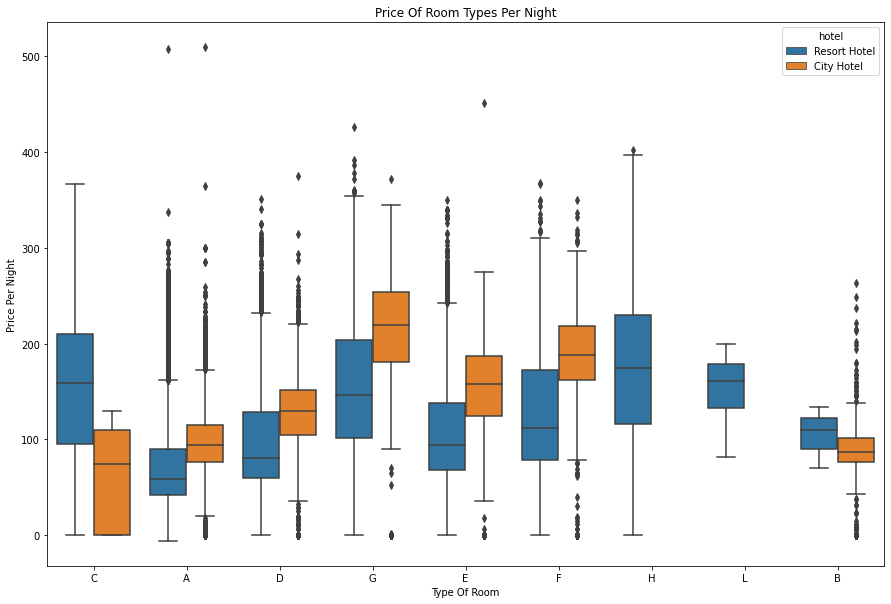

In [18]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df[df['is_canceled'] == 0],x='reserved_room_type',y='adr',hue='hotel')
plt.title('Price Of Room Types Per Night')
plt.xlabel('Type Of Room')
plt.ylabel('Price Per Night')
plt.show()


## How does the price of room per night vary over the year?

In [19]:
def data(df):
    data = df[df['is_canceled']==0].groupby('arrival_date_month')['adr'].mean().reset_index()
    return data

In [20]:
data2 = data(resort)

In [21]:
data2 = data2.merge(data(city),on='arrival_date_month')
data2.head()

,arrival_date_month,adr_x,adr_y
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634


In [22]:
data2.columns = ['month','price_for_resort','price_for_city']
data2

,month,price_for_resort,price_for_city
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


In [23]:
! pip install sorted-months-weekdays
! pip install sort-dataframeby-monthorweek

  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=584a2470c122eee3f8fb627b3a3c5aefcb80b45c89cd891529515d5c028e309a
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3441 sha256=36d099b9e39fe068e1409873748bf5d4df45664c42c760dc5e38805e0ae9b62e
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek


In [24]:
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *


final = Sort_Dataframeby_Month(df=data2,monthcolumnname='month')

In [25]:
px.line(final,x='month',y=['price_for_resort','price_for_city'],title='Room price per night over the year')

#### Resort-Hotel prices are much higher during the summer,whereas the prices of City-Hotel doesn't get much higher in summer 

## Distribution of nights spent at hotels by market segment and hotel type

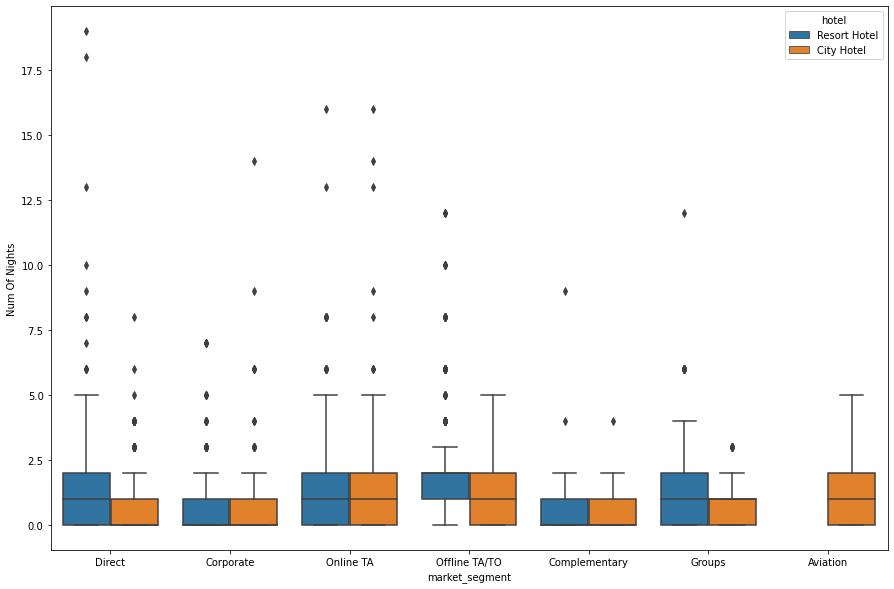

In [26]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df[df['is_canceled'] == 0],x='market_segment',y='stays_in_weekend_nights',hue='hotel')
plt.ylabel('Num Of Nights')
plt.show()

#### Most people don't seem to prefer to stay at the hotel more than one week

## Analysing preference of guests

<AxesSubplot:xlabel='market_segment', ylabel='stays_in_weekend_nights'>

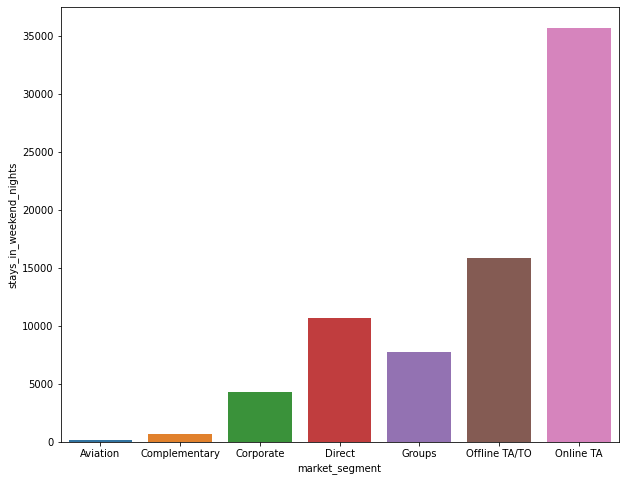

In [27]:
plt.figure(figsize=(10,8))
sns.barplot(x=df[df['is_canceled']==0].groupby('market_segment')['stays_in_weekend_nights'].count().index,
            y=df[df['is_canceled']==0].groupby('market_segment')['stays_in_weekend_nights'].count())

#### The online travel agents are the best market for reservation by people

In [28]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [29]:
px.pie(data_frame=df[df['is_canceled']==0],names=df['meal'].value_counts().index,values=df['meal'].value_counts())

#### The guests are prefered to booked meal **BB** Bed & Breakfast

## Analysing relationship between special requests and cancellation

<AxesSubplot:xlabel='total_of_special_requests', ylabel='count'>

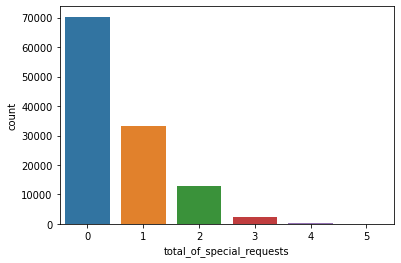

In [30]:
sns.countplot(x=df.total_of_special_requests)  

In [31]:
 100 * len(df[df['total_of_special_requests'] == 0]) / len(df)

58.89773012815144

#### It seems this is almost 60 percent of the bookers don't have any special requests

In [32]:
df.groupby(['total_of_special_requests','is_canceled']).agg({'total_of_special_requests':'count'}).unstack()

total_of_special_requests       
is_canceled                                       0      1
total_of_special_requests                                 
0                                             36762  33556
1                                             25908   7318
2                                             10103   2866
3                                              2051    446
4                                               304     36
5                                                38      2

<AxesSubplot:xlabel='total_of_special_requests', ylabel='count'>

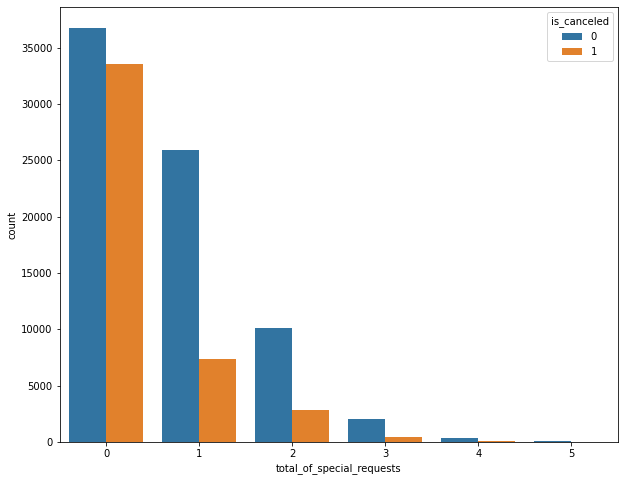

In [33]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='total_of_special_requests',hue='is_canceled')

## Which months guests are high?

In [34]:
df.arrival_date_year.unique()

array([2015, 2016, 2017])

In [35]:
df.arrival_date_month.value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [36]:
df.groupby(['arrival_date_year','arrival_date_month']).agg({'is_canceled':'count'}).unstack()

is_canceled                                            \
arrival_date_month       April  August December February January    July   
arrival_date_year                                                          
2015                       NaN  3889.0   2920.0      NaN     NaN  2776.0   
2016                    5428.0  5063.0   3860.0   3891.0  2248.0  4572.0   
2017                    5661.0  4925.0      NaN   4177.0  3681.0  5313.0   

                                                                       
arrival_date_month    June   March     May November October September  
arrival_date_year                                                      
2015                   NaN     NaN     NaN   2340.0  4957.0    5114.0  
2016                5292.0  4824.0  5478.0   4454.0  6203.0    5394.0  
2017                5647.0  4970.0  6313.0      NaN     NaN       NaN

Text(0, 0.5, 'Num of Guests')

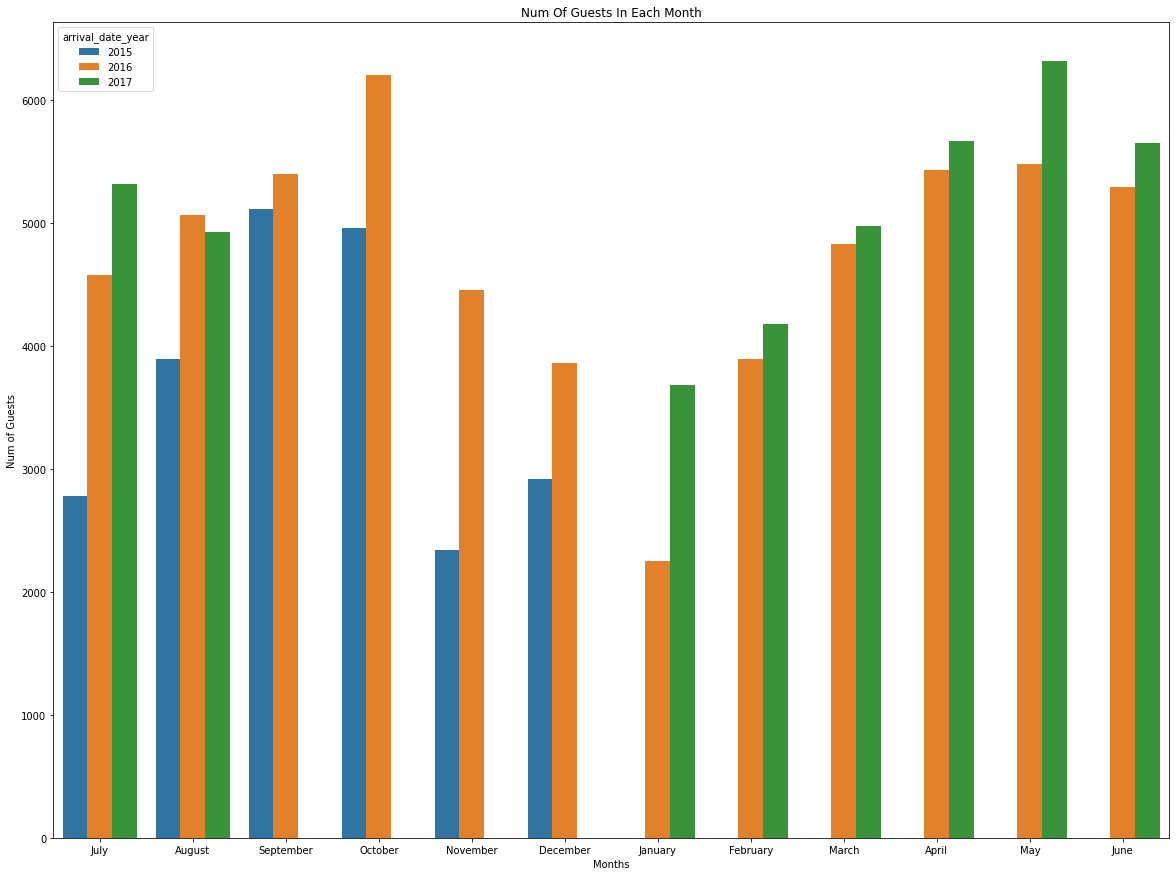

In [37]:
plt.figure(figsize=(20,15))
sns.countplot(data=df,x='arrival_date_month',hue='arrival_date_year')
plt.title('Num Of Guests In Each Month')
plt.xlabel('Months')
plt.ylabel('Num of Guests')

#### In 2015 the most number of guests come at **September**

#### In 2016 the most number of guests come at **October**

#### In 2017 the most number of guests come at **May**

In [38]:
100 * df.corr()['is_canceled'].sort_values()

total_of_special_requests         -23.465777
required_car_parking_spaces       -19.549782
booking_changes                   -14.438099
is_repeated_guest                  -8.479342
company                            -8.299480
previous_bookings_not_canceled     -5.735772
agent                              -4.652945
babies                             -3.249109
arrival_date_day_of_month          -0.613008
stays_in_weekend_nights            -0.179108
children                            0.503625
arrival_date_week_number            0.814807
arrival_date_year                   1.665986
stays_in_week_nights                2.476463
adr                                 4.755660
days_in_waiting_list                5.418582
adults                              6.001721
previous_cancellations             11.013281
lead_time                          29.312336
is_canceled                       100.000000
Name: is_canceled, dtype: float64

<AxesSubplot:>

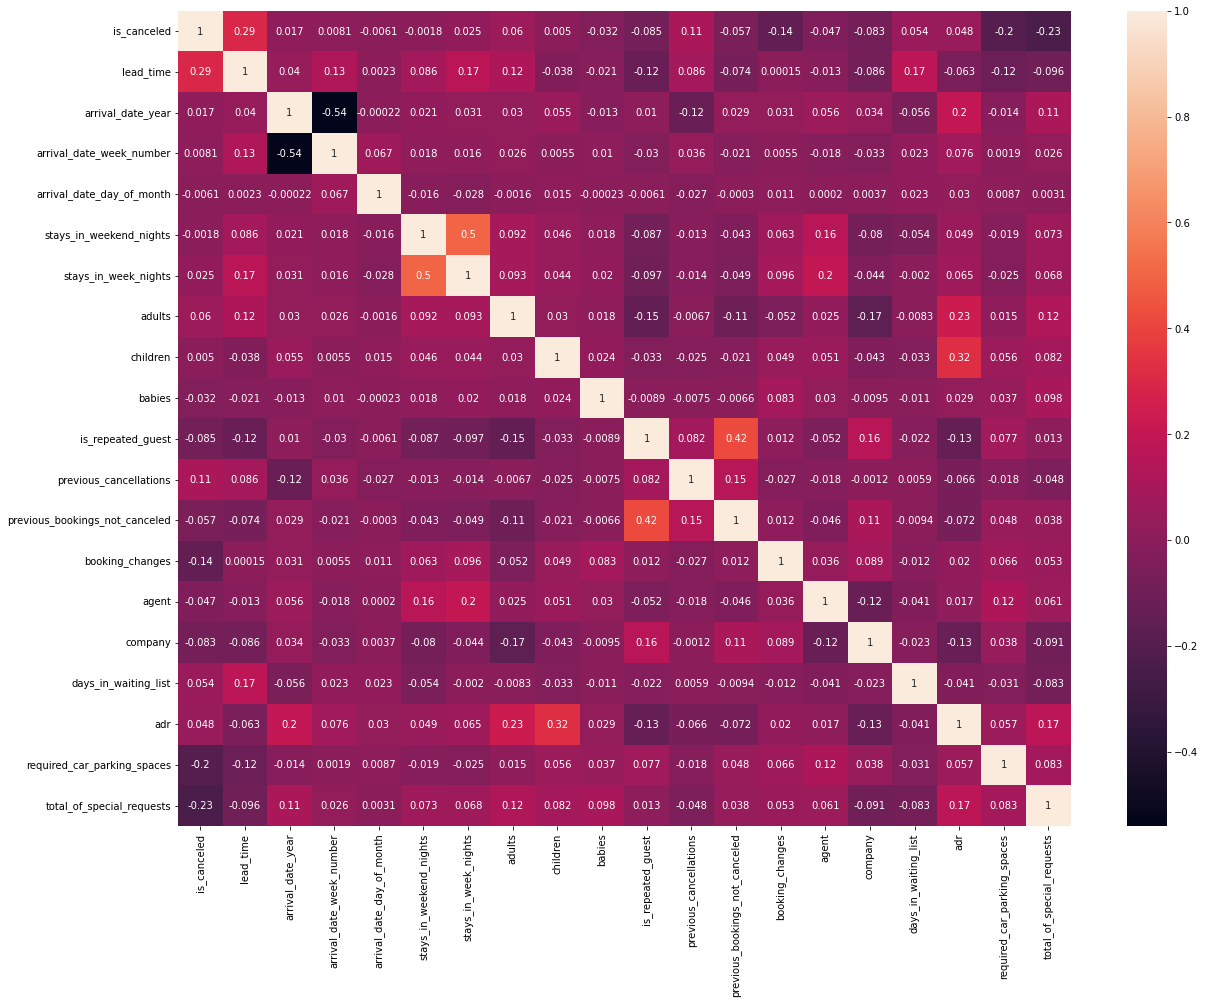

In [39]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

# Modeling

In [40]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [41]:
df = df.drop_duplicates()
len(df)

87377

In [42]:
label = ['company','agent','total_of_special_requests','required_car_parking_spaces','booking_changes',
         'is_repeated_guest','reservation_status_date','stays_in_weekend_nights','stays_in_week_nights',
         'reserved_room_type','assigned_room_type','adults','children','babies']
df.drop(labels=label,axis=1,inplace=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,previous_cancellations,previous_bookings_not_canceled,deposit_type,days_in_waiting_list,customer_type,adr,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,BB,PRT,Direct,Direct,0,0,No Deposit,0,Transient,0.0,Check-Out
1,Resort Hotel,0,737,2015,July,27,1,BB,PRT,Direct,Direct,0,0,No Deposit,0,Transient,0.0,Check-Out
2,Resort Hotel,0,7,2015,July,27,1,BB,GBR,Direct,Direct,0,0,No Deposit,0,Transient,75.0,Check-Out
3,Resort Hotel,0,13,2015,July,27,1,BB,GBR,Corporate,Corporate,0,0,No Deposit,0,Transient,75.0,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,BB,GBR,Online TA,TA/TO,0,0,No Deposit,0,Transient,98.0,Check-Out


In [43]:
X = df.drop(['is_canceled'],axis=1)
y = df['is_canceled']

In [44]:
X = pd.get_dummies(X,drop_first=True)

In [45]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## Selection model

In [46]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver='liblinear')
log.fit(X_train,y_train)
#Print the model accuracy of training data
print('Logistic Regression Training Accuracy : ',log.score(X_train, y_train))

Logistic Regression Training Accuracy :  1.0


In [47]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test,log.predict(X_test))
print(cm)
print('Accuracy ',accuracy_score(y_test,log.predict(X_test)))


[[15894     0]
 [    0  5951]]
Accuracy  1.0


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,log.predict(X_test)))
    

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15894
           1       1.00      1.00      1.00      5951

    accuracy                           1.00     21845
   macro avg       1.00      1.00      1.00     21845
weighted avg       1.00      1.00      1.00     21845



## In the end , we find that **LogisiticRegression** is more accurate 